In [1]:
import os
import pandas as pd
from utils.visuailize import visualize_nii_slices, tree
os.chdir('..')

## Dicom dir looks like

In [2]:
tree('./example/sample_data', max_files=3)

sample_data/
    MR201403200524/
        1.2.840.113619.2.176.3596.11861954.7743.1395176361.648.dcm
        1.2.840.113619.2.176.3596.11861954.7743.1395176361.878.dcm
        1.2.840.113619.2.176.3596.11861954.7743.1395176359.757.dcm
        ... and 942 more files
    020/
        MR417599/
            DJ20221225A0071/
                ApparentDiffusionCoefficient(mm2s)_700_7/
                    3.0.dcm
                    20.0.dcm
                    22.0.dcm
                    ... and 21 more files
                3PlLocSSFSE_1_1/
                    3.0.dcm
                    10.0.dcm
                    7.0.dcm
                    ... and 16 more files
                ExponentialApparentDiffusionCoefficient_701_8/
                    ... and more files (reached max_lines=20)

... and more directories (reached max_lines=20)


## Convert to Nifti

In [3]:
%run dcmsort2nii/main.py example/sample_data -o example/sample_output --split --log_error

Using default number of workers: 32
Scanning directories and analyzing sequences...
Scan complete. Found 9 leaf directories containing 31 sequences to process.
Using temporary directory for sequence results: /home/dell/work/code/dcmsort2nii/example/sample_output/dicom_seq_results_7i29xdsz
Submitting 31 sequence tasks to 32 workers...


Processing Sequences: 100%|██████████| 31/31 [00:10<00:00,  2.91it/s]

Aggregating results...
Found 26 temporary result files.
Successfully aggregated 34 entries.
Removed temporary directory: /home/dell/work/code/dcmsort2nii/example/sample_output/dicom_seq_results_7i29xdsz
Final mapping saved to: example/sample_output/nifti_dicom_mapping.parquet
Error log saved to: example/sample_output/error_log.csv


## Output dir looks like

In [4]:
tree('./example/sample_output', max_files=3)

sample_output/
    error_log.csv
    nifti_dicom_mapping.parquet
    MR201403200524/
        20140320_0006_OSag_T2.nii.gz
        20140320_0008_3-pl_ssfse_Loc_vol_0000.nii.gz
        20140320_0024_Ax_LAVA+C_vol_0001.nii.gz
        ... and 19 more files
    020/
        MR417599/
            DJ20221225A0071/
                ApparentDiffusionCoefficient(mm2s)_700_7/
                    20221225_0700_Apparent_Diffusion_Coefficient_(mm2s).nii.gz
                3PlLocSSFSE_1_1/
                ExponentialApparentDiffusionCoefficient_701_8/
                    20221225_0701_Exponential_Apparent_Diffusion_Coefficient.nii.gz
                OSagT2FSE_2_2/
                    20221225_0002_OSag_T2FSE.nii.gz
                AxT1FSEBigFOV_5_5/
                    20221225_0005_Ax_T1FSE_Big_FOV.nii.gz

... and more directories (reached max_lines=20)


## Save meta data and mapping between dicom and nifti files

In [5]:
import pandas as pd
mapping = pd.read_parquet('example/sample_output/nifti_dicom_mapping.parquet')
print(f"number of columns: {len(mapping.columns)}")
# instead of displaying the full path
mapping['Nifti Filename'] = mapping['NiftiFile'].apply(lambda x: os.path.basename(x))
mapping['First Dicom Filename'] = mapping['FirstDicomFile'].apply(lambda x: os.path.basename(x))
mapping[['Nifti Filename', 'First Dicom Filename', 'Acquisition Date', 'SOP Class UID', 'Series Instance UID', 'Modality']].head()


number of columns: 302


,Nifti Filename,First Dicom Filename,Acquisition Date,SOP Class UID,Series Instance UID,Modality
0,20140320_0013_BH_Ax_T2_SSFSE.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR
1,20140320_0026_Sag_LAVA+C.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR
2,20140320_0018_OSag_fs_T2.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR
3,20140320_0005_OAx_T2FLAIR.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR
4,20140320_0023_OAx_T2.nii.gz,1.2.840.113619.2.176.3596.11861954.7743.139517...,20140320,1.2.840.10008.5.1.4.1.1.4,1.2.840.113619.2.176.3596.11861954.7814.139517...,MR


Image 1: example/sample_output/MR201403200524/20140320_0025_Cor_LAVA+C.nii.gz
Image 2: example/sample_output/MR201403200524/20140320_0020_3-pl_Loc_T2.nii.gz
Image 3: example/sample_output/MR201403200524/20140320_0005_OAx_T2FLAIR.nii.gz
Image 4: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/20221225_0007_Ax_eDWI_special_vol_0005.nii.gz
Image 5: example/sample_output/MR201403200524/20140320_0006_OSag_T2.nii.gz
Image 6: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/20221225_0007_Ax_eDWI_special_vol_0004.nii.gz
Image 7: example/sample_output/020/MR417599/DJ20221225A0071/AxT2FSE_3_3/20221225_0003_Ax_T2FSE.nii.gz
Image 8: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/20221225_0007_Ax_eDWI_special_vol_0003.nii.gz
Image 9: example/sample_output/020/MR417599/DJ20221225A0071/AxeDWIspecial_7_6/20221225_0007_Ax_eDWI_special_vol_0002.nii.gz
Image 10: example/sample_output/MR201403200524/20140320_0008_3-pl_ssfse_Loc_vol_0000.nii.gz

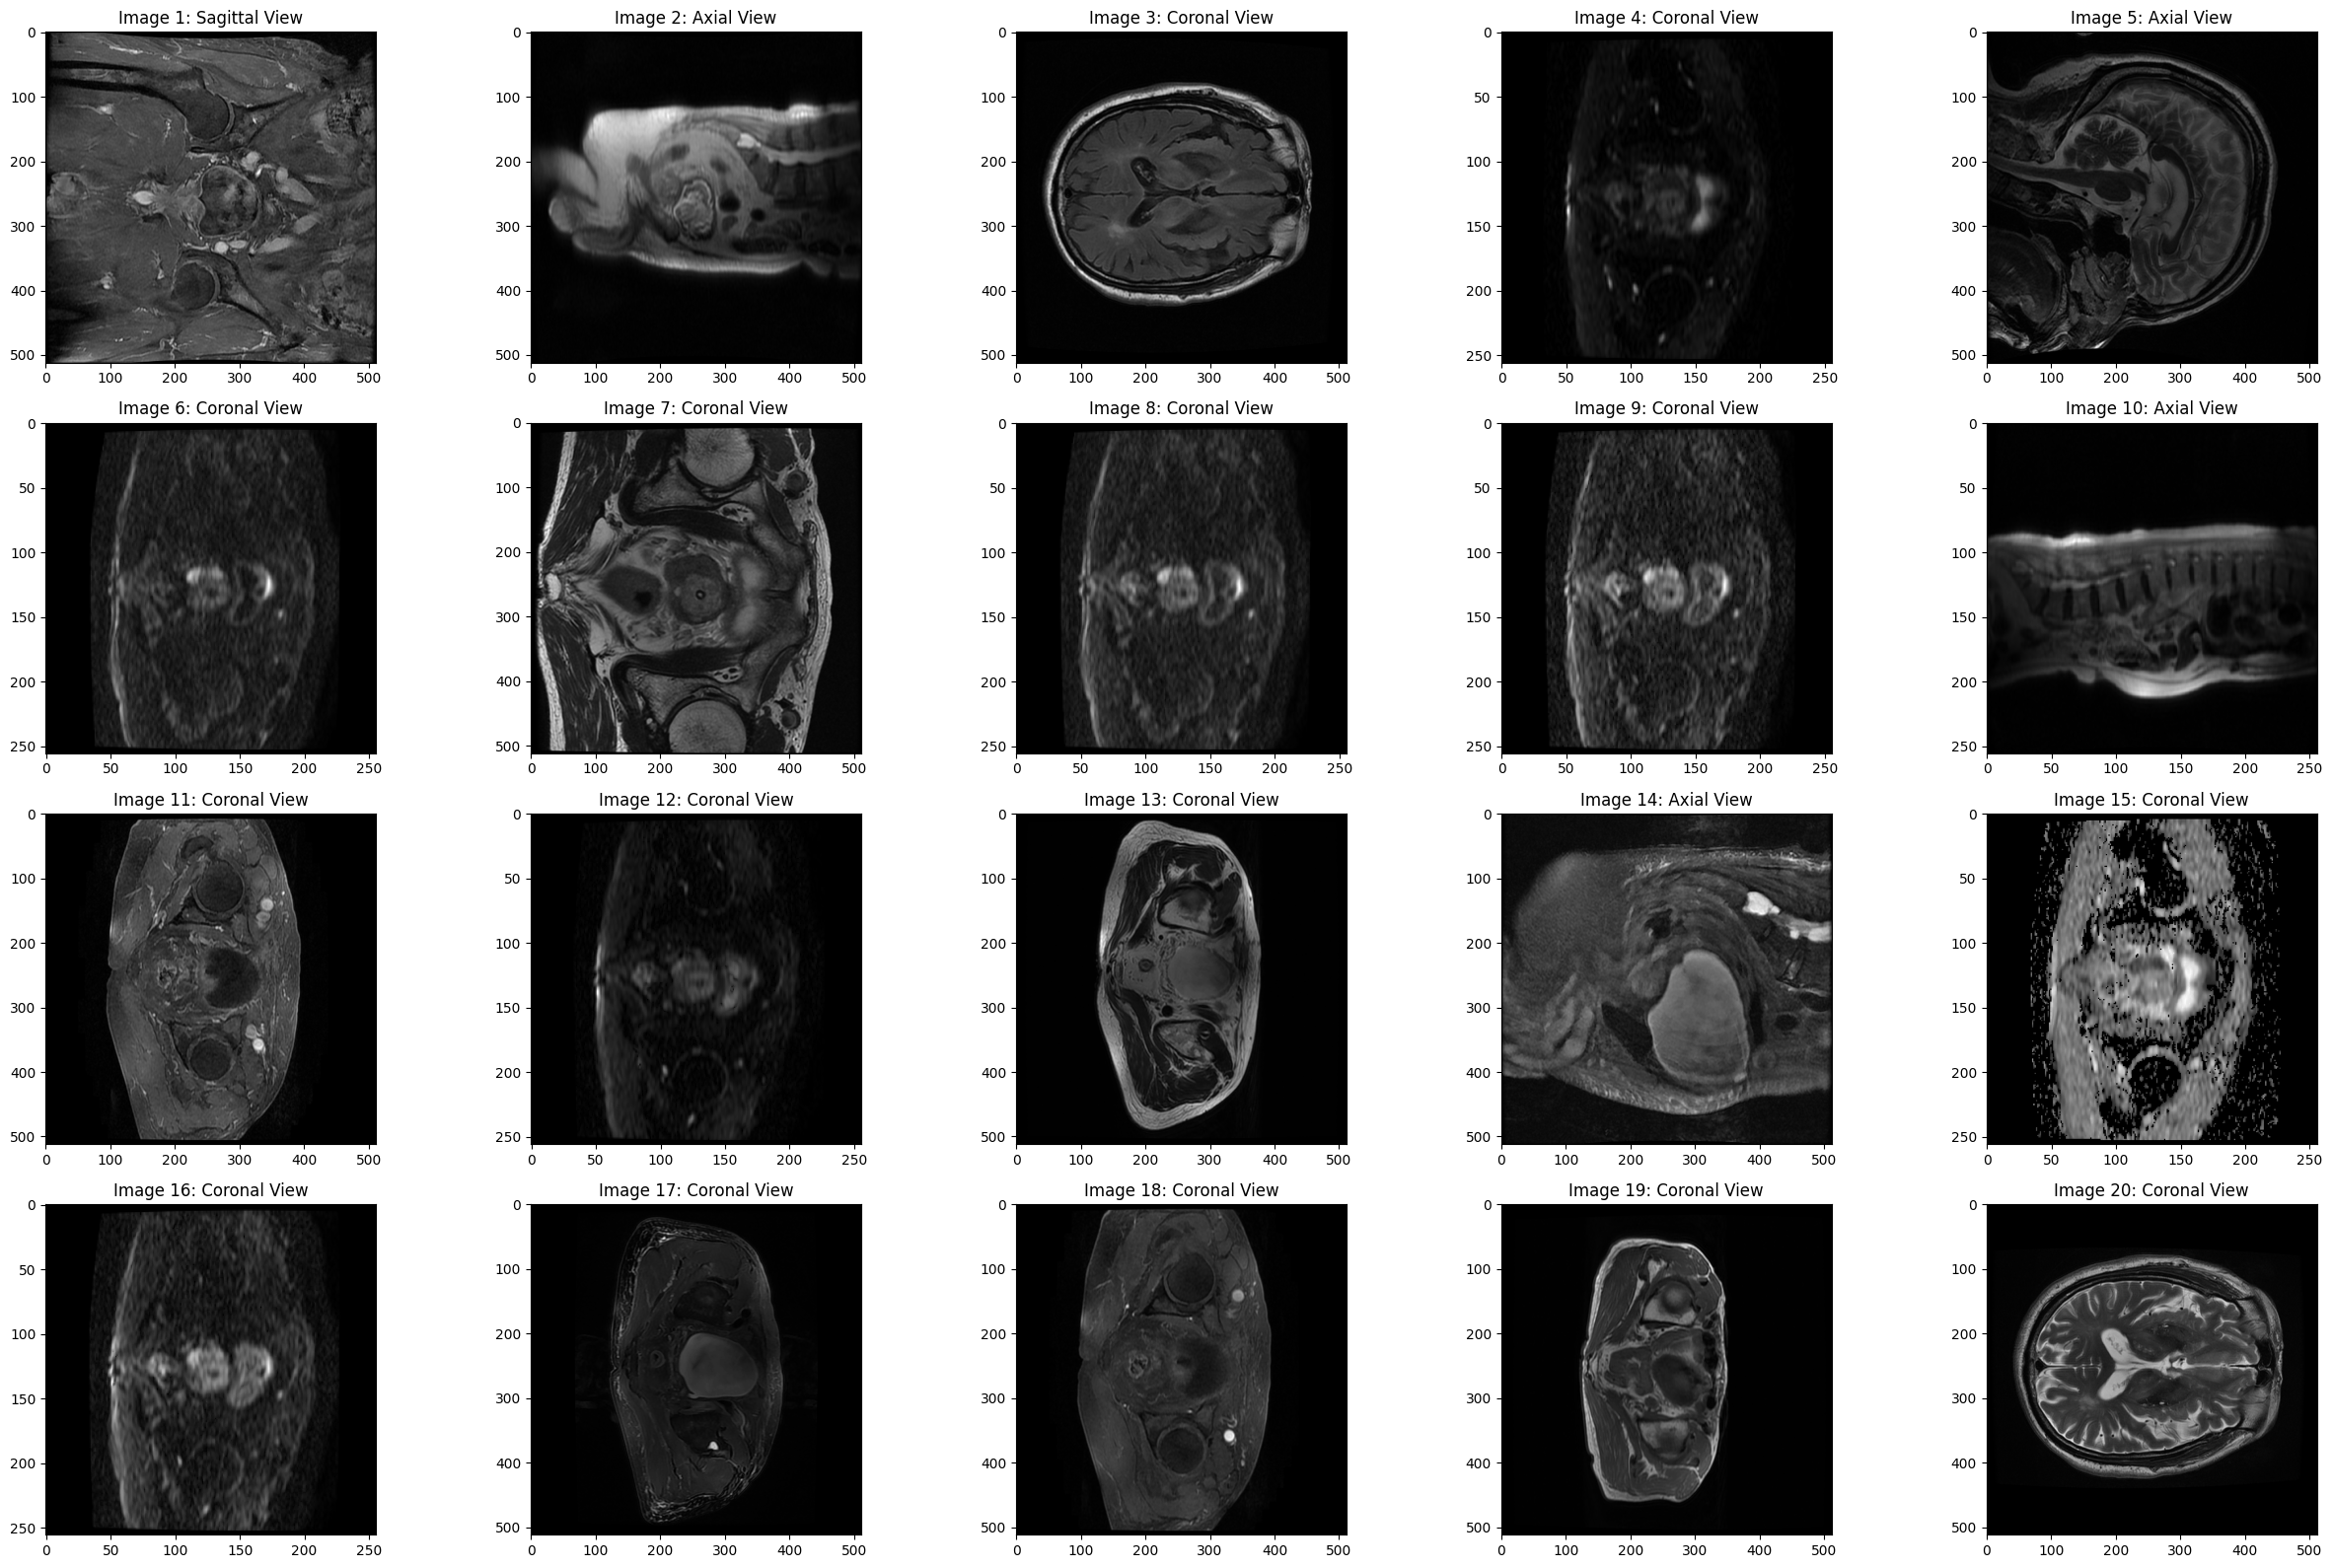

In [6]:
nifti_list = mapping['NiftiFile'].sample(len(mapping), random_state=1).tolist()
visualize_nii_slices(nifti_list,)

## Restructure or modify the directory using saved metadata

In [7]:
new_output_dir = 'example/sample_output/restructured'
os.makedirs(new_output_dir, exist_ok=True)
for _, row in mapping.iterrows():
    series_dir = os.path.join(new_output_dir, row['Series Instance UID'])
    os.makedirs(series_dir, exist_ok=True)
    nifti_file = row['NiftiFile']
    new_nifti_file = os.path.join(series_dir, os.path.basename(nifti_file))
    os.rename(nifti_file, new_nifti_file)
tree(new_output_dir, max_files=3)

restructured/
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.840/
        20140320_0024_Ax_LAVA+C_vol_0001.nii.gz
        20140320_0024_Ax_LAVA+C_vol_0002.nii.gz
        20140320_0024_Ax_LAVA+C_vol_0000.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.841/
        20140320_0025_Cor_LAVA+C.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.823/
        20140320_0010_Ax_fs_T2_RT.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.817/
        20140320_0005_OAx_T2FLAIR.nii.gz
    1.2.840.113619.2.353.2807.8095175.15521.1670925686.621/
        20221225_0002_OSag_T2FSE.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.820/
        20140320_0008_3-pl_ssfse_Loc_vol_0000.nii.gz
        20140320_0008_3-pl_ssfse_Loc_vol_0001.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.831/
        20140320_0017_Ax_fs_T2_RT.nii.gz
    1.2.840.113619.2.176.3596.11861954.7814.1395176224.838/
        20140320_0022_OAx_T1.nii.gz

... and more dir

## Errors during conversion

In [8]:
error_log = pd.read_csv('example/sample_output/error_log.csv')
error_log.head()

,SequenceName,FirstDicomFile,Step,Error
0,20140320_0001_3-pl_Loc_T2,example/sample_data/MR201403200524/1.2.840.113...,Conversion/Processing,dicom2nifti.convert_directory failed convertin...
1,20140320_0701_PJN,example/sample_data/MR201403200524/1.2.840.113...,Conversion/Processing,dicom2nifti.convert_directory failed convertin...
2,20140320_0700_PJN,example/sample_data/MR201403200524/1.2.840.113...,Conversion/Processing,dicom2nifti.convert_directory failed convertin...
3,20221225_0001_3-Pl_Loc_SSFSE,example/sample_data/020/MR417599/DJ20221225A00...,Conversion/Processing,dicom2nifti.convert_directory failed convertin...
4,"20140320_0007_E3DTOF_MRA,_3slab",example/sample_data/MR201403200524/1.2.840.113...,Conversion/Processing,dicom2nifti.convert_directory failed convertin...


In [10]:
error_log.Error.values[0]

'dicom2nifti.convert_directory failed converting 9 files: example/sample_data/MR201403200524/1.2.840.113619.2.176.3596.11861954.7743.1395176359.243.dcm'